# Inference Metrics
In this notebook you will calculate various inference metrics for regression and classification problems, given a set of truth labels $y$ and a corresponding label estimates $\hat{y}$.

There are many statistical packages (e.g., sklearn) that can calculate these metrics for you.  These homework problems are simple enough that you should not need to use these packages (really!).  However, if you choose to, be aware that they may not always produce the same output as we are requesting.  For example, [sklearn.models.confusion_matrix()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) does not output the confusion matrix in the same format as the grader expects.

There are often multiple acceptable calculations for different metrics (e.g., incorporating normalization, weighting, etc.).  If you are unclear which version to use, refer to the Medlytics lecture notes.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline  
matplotlib.rcParams.update({'font.size': 16})

## Question 1: Calculate $R^2$ of a regression model
$R^2$ is defined in terms of the sum of squared residuals ($S$) and what is called the total sum of squares ($SS_{total}$). Where $\bar{y}$ is the average of your $y_i$'s, the total sum of squares is:

&emsp;&emsp;  $SS_{total}=\sum_i^n{(y_i-\bar{y})^2}$

which can be thought of as a measure of the variance in the $y$'s of your data. $R^2$ is defined as:

&emsp;&emsp;  $R^2=1-\frac{S}{SS_{total}}$

You can see how $R^2$ is almost like a "scaled" version of the sum of squared residuals. A high $S$ in relation to the total spread of the data will give an $R^2$ close to 0, whereas a lower $S$ will produce an $R^2$ closer to 1. This scaling makes it easer to evaluate whether your $R^2$ is "good" or not.

### Examples
Here are some examples you can try to make sure your function outputs what's expected:
```python
>>> y = numpy.array([[-170.], [ -57.], [-156.], [ -32.], [  -8.]])
>>> yhat = numpy.array([[-155.], [ -64.], [-163.], [ -45.], [   5.]])
>>> calc_R2(y,yhat)
0.9696610854079459
```


```python
>>> y = numpy.array([[  42.], [ 336.], [  17.]])
>>> yhat = numpy.array([[   3.], [ 327.], [  65.]])
>>> calc_R2(y,yhat)
0.9379415534206819
```

In [2]:
def calc_R2(y,yhat):
    """
    Calculate R2 for true y and estimated yhat.  Assume the arrays are aligned, 
    i.e., the ith index of yhat corresponds to the estimate of the ith index of y.
    
    Parameters
    ----------
    y :   numpy.ndarray
          y.shape is (M,1)
          Each row of `y` is a 1-dimensional float
        
    yhat: numpy.ndarray
          yhat.shape is (M,1)
        
          
    Returns
    -------
    R2 :  float
    """
    
    # STUDENT CODE GOES HERE
    mean = np.mean(y)
    x = y-mean
    v = y-yhat
    S = v.T.dot(v)
    SS = x.T.dot(x)
    return 1-S/SS

In [3]:
# Execute this cell to grade your work
from grader import test_R2
test_R2(calc_R2)

Using grader version: 1.2
============================== ALL TESTS PASSED! ===============================
Your submission code: bwdfd5f9139a820075df69d7895015360b76d0360f3d4b77a845689614


## Question 2: Calculate the Confusion Matrix
Given an array of truth labels $y$ and corresponding estimated labels $\hat{y}$, calculate the confusion matrix:
$\begin{bmatrix}TP & FP \\ FN & TN\end{bmatrix}$ where:

&emsp;&emsp;  $TP$ = number of true positives

&emsp;&emsp;  $FP$ = number of false positives

&emsp;&emsp;  $FN$ = number of false negatives

&emsp;&emsp;  $TN$ = number of true negatives

### Examples
Here are some examples you can try to make sure your function outputs what's expected:
```python
>>> y    = np.array([[1], [1], [1], [0], [1]])
>>> yhat = np.array([[1], [1], [1], [0], [1]])
>>> conf_mat(y,yhat)
array([[4, 0],
       [0, 1]])
```



```python
>>> y    = np.array([[1], [1], [1], [0], [1], [0], [1], [0], [1], [1]])
>>> yhat = np.array([[0], [1], [0], [1], [1], [0], [1], [0], [0], [0]])
>>> conf_mat(y,yhat)
array([[3, 1],
       [4, 2]])
```

In [4]:
def conf_mat(y,yhat):
    """
    Write a function that generates the confusion matrix from truth y and estimates yhat.
    Assume that the elements in the arrays are aligned (i.e., ith entry of yhat corresponds to the ith entry of y)
    
    
    Parameters
    ----------
    y:      numpy.array 
            y.shape is (M,1)
            y contains M data points, where each data point is a true class label: 
                0 (negative class) or 1 (positive class)
    
    yhat:   numpy.array 
            yhat.shape is (M,1)
            yhat contains M data points, where each data point is an estimated class label: 
                0 (negative class) or 1 (positive class)
           
    Returns
    -------
    
    cmatrix: numpy.ndarray
             cmatrix.shape is (2,2)
             assume cmatrix should be of the form: [[TP, FP]
                                                    [FN, TN]]
    
    """
    
    # STUDENT CODE GOES HERE
    y1 = y*2
    temp = y1-yhat
    tp = np.count_nonzero(temp == 1)
    fp = np.count_nonzero(temp == -1)
    fn = np.count_nonzero(temp == 2)
    tn = np.count_nonzero(temp == 0)
    return np.array([[tp,fp],[fn,tn]])

In [5]:
# Execute this cell to grade your work

from grader import test_confusionmat
test_confusionmat(conf_mat)

============================== ALL TESTS PASSED! ===============================
Your submission code: bwb51d18b551043c1f145f22dbde6f8531faeaf68c54ed9dd79ce24d17


## Question 3: Calculate classification metrics from a confusion matrix
Given the confusion matrix: $\begin{bmatrix}TP & FP \\ FN & TN\end{bmatrix}$, calculate the classifier's accuracy, F1-score, precision, recall, and specificity.

### Examples
Here are some examples you can try to make sure your function outputs what's expected:
```python
>>> cmatrix = np.array([[4, 0],[0, 1]])
>>> metrics_confmat(cmatrix)
{'F1': 1.0,
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'specificity': 1.0}
```



```python
>>> cmatrix = np.array([[5, 2],[14, 2]])
>>> metrics_confmat(cmatrix)
{'F1': 0.38461538461538458,
 'accuracy': 0.30434782608695654,
 'precision': 0.7142857142857143,
 'recall': 0.26315789473684209,
 'specificity': 0.5}
```

In [6]:
def metrics_confmat(cmatrix):
    """
    Write a function that calculates a variety of classification metrics from a confusion matrix.
    
    Parameters
    ----------
    cmatrix: numpy.ndarray
             cmatrix.shape is (2,2)
             assume cmatrix is of the form: [[TP, FP]
                                             [FN, TN]]
                                             
    Returns
    -------
    m:       dictionary
             each item in dictionary should correspond to a different metric: 
                 m['accuracy']    = accuracy
                 m['F1']          = F1-score
                 m['precision']   = precision
                 m['recall']      = recall (aka: true positive rate, sensitivity)
                 m['specificity'] = specificity (aka: true negative rate)
    
    """
    
    # STUDENT CODE GOES HERE
    tp = cmatrix[0][0]
    fp = cmatrix[0][1]
    fn = cmatrix[1][0]
    tn = cmatrix[1][1]
    acc = (tp+tn)/(tp+fp+fn+tn)
    pre = tp/(tp+fp)
    rec = tp/(tp+fn)
    f1 = 2*(pre*rec)/(pre+rec)
    spe = tn/(tn+fp)
    res = {'accuracy':acc,'F1':f1,'precision':pre,'recall':rec, 'specificity':spe}
    return res
    
    

In [7]:
# Execute this cell to grade your work
from grader import test_accuracy
test_accuracy(metrics_confmat)

============================== ALL TESTS PASSED! ===============================
Your submission code: bwdfd5f9139a820075df69d7895015360b76d0360f3d4b77a845689614


# Visualize the ROC curve

[scikit-learn](http://scikit-learn.org/) is another very convenient python package for performing machine learning and other data anslysis.  We will start using this package more later, but for now we will use it to visualize classification metrics when we have a classification score and sweep over the possible threshold values $T$ where :

&emsp;&emsp;  $\hat{y}_{class}=0$ if $\hat{y}<T$ 

&emsp;&emsp;  $\hat{y}_{class}=1$ if $\hat{y}\ge T$ 

If you don't already have scikit-learn installed, you can get install it from anaconda:

<pre>`conda install scikit-learn`



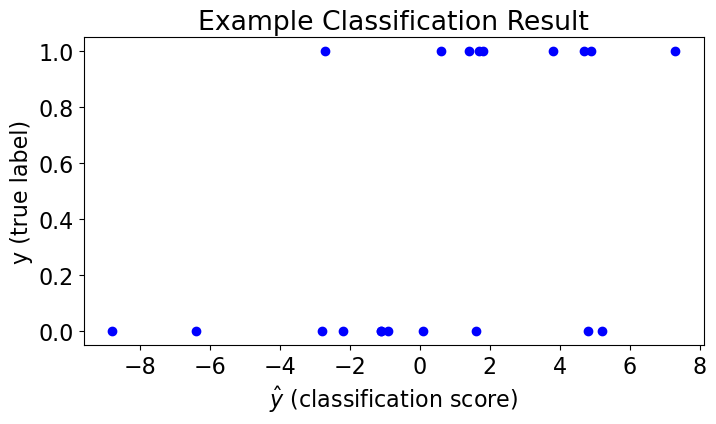

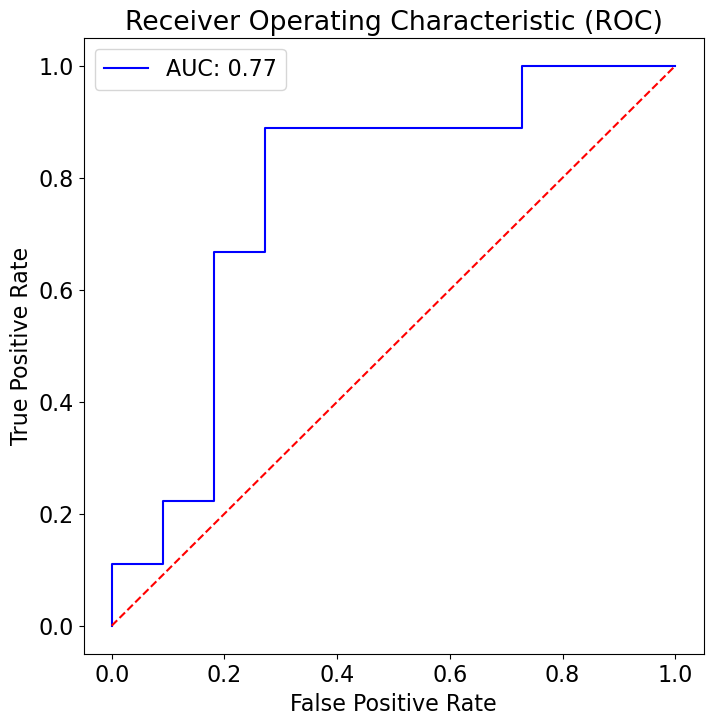

In [8]:
# Execute this cell to plot an example ROC curve

from sklearn import metrics

y    = [   0,    0,    1,   1,   1,   0,    0,   1,   1,   1,   1,    0,    0,    0,   0,    0,   1,   1,   0,   0]
yhat = [-2.8, -1.1, -2.7, 3.8, 0.6, 1.6, -1.1, 1.4, 4.7, 7.3, 4.9, -0.9, -8.8, -2.2, 5.2, -6.4, 1.7, 1.8, 0.1, 4.8]


plt.figure(figsize=(8, 4))
plt.scatter(yhat,y,color='blue')
plt.ylabel('y (true label)')
plt.xlabel(r'$\hat{y}$'+' (classification score)')
plt.title('Example Classification Result')


fpr, tpr, thresholds = metrics.roc_curve(y, yhat)
auc = metrics.roc_auc_score(y, yhat)

plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,color='blue',label='AUC: {:0.2f}'.format(auc))
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

Text(0.5, 1.0, '2-class Precision-Recall Example')

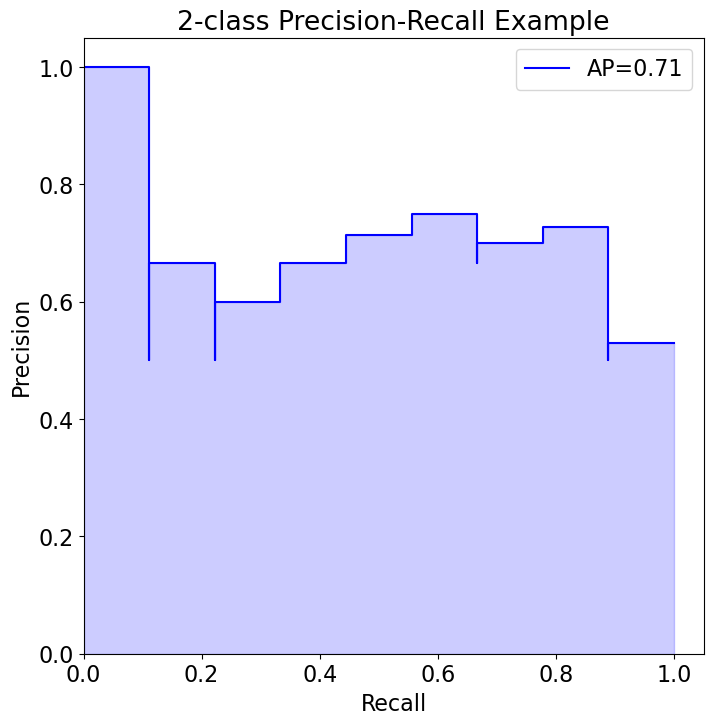

In [10]:
# Execute this cell to plot an example PR curve

average_precision = metrics.average_precision_score(y, yhat)
precision, recall, _ = metrics.precision_recall_curve(y, yhat)

plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', where='post', label='AP={0:0.2f}'.format(average_precision))
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.legend()
plt.title('2-class Precision-Recall Example')
